## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [ ]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:

def build_mlp():
    """Code Here
    建立你的神經網路
    """
    return model

In [ ]:
"""Code Here
設定超參數
"""

In [ ]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 500

50000/50000 [==============================] - 5s 101us/step - loss: 11.4476 - acc: 0.3951 - val_loss: 11.4108 - val_acc: 0.3956
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 11.3710 - acc: 0.3933 - val_loss: 11.3358 - val_acc: 0.3978
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 11.2950 - acc: 0.3946 - val_loss: 11.2599 - val_acc: 0.3971
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 11.2195 - acc: 0.3954 - val_loss: 11.1838 - val_acc: 0.3970
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)            

50000/50000 [==============================] - 5s 102us/step - loss: 1.8405 - acc: 0.4076 - val_loss: 1.8440 - val_acc: 0.4039
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.8373 - acc: 0.4079 - val_loss: 1.8413 - val_acc: 0.4047
Epoch 50/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.8341 - acc: 0.4097 - val_loss: 1.8370 - val_acc: 0.4052
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_

50000/50000 [==============================] - 5s 102us/step - loss: 1.6921 - acc: 0.4113 - val_loss: 1.6942 - val_acc: 0.4062
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6891 - acc: 0.4120 - val_loss: 1.6904 - val_acc: 0.4094


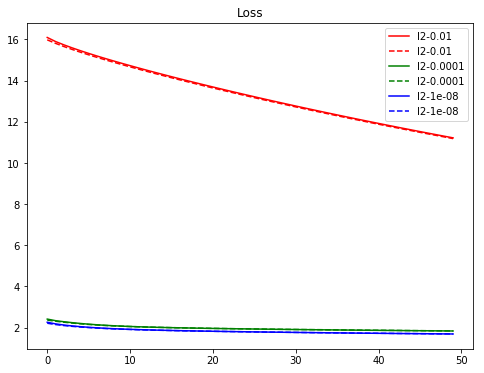

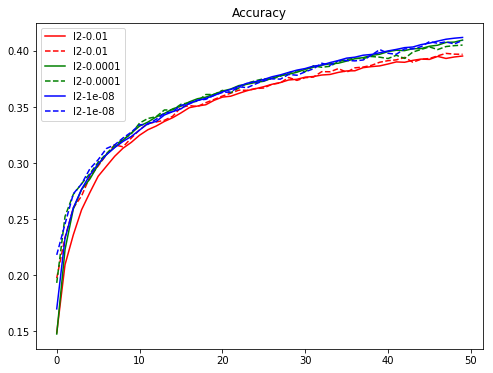

In [2]:
#比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.layers import Dropout
import itertools
%matplotlib inline
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
results = {}
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
# BATCH_SIZE = [32,128, 256, 1024]
BATCH_SIZE = 256
Dropout_EXP = [0.05,0.15,0.25,0.35]
L2_EXP = [1e-2, 1e-4, 1e-8]
results = {}
for l2r in iter(L2_EXP):   
    model = build_mlp(input_shape=x_train.shape[1:],l2_ratio=l2r)
    model.summary()
    optimizer = optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag ="l2-%s" % (str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________

50000/50000 [==============================] - 4s 86us/step - loss: 1.7402 - acc: 0.3856 - val_loss: 1.7082 - val_acc: 0.4036
Epoch 48/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7378 - acc: 0.3863 - val_loss: 1.7045 - val_acc: 0.4047
Epoch 49/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7340 - acc: 0.3894 - val_loss: 1.7012 - val_acc: 0.4050
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7315 - acc: 0.3881 - val_loss: 1.6980 - val_acc: 0.4051
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0        

50000/50000 [==============================] - 4s 86us/step - loss: 1.8235 - acc: 0.3491 - val_loss: 1.7644 - val_acc: 0.3825
Epoch 46/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8207 - acc: 0.3501 - val_loss: 1.7602 - val_acc: 0.3870
Epoch 47/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8143 - acc: 0.3511 - val_loss: 1.7559 - val_acc: 0.3874
Epoch 48/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8138 - acc: 0.3511 - val_loss: 1.7535 - val_acc: 0.3879
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8087 - acc: 0.3521 - val_loss: 1.7504 - val_acc: 0.3876
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8062 - acc: 0.3539 - val_loss: 1.7468 - val_acc: 0.3900
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)           

50000/50000 [==============================] - 4s 87us/step - loss: 1.8847 - acc: 0.3185 - val_loss: 1.8026 - val_acc: 0.3658
Epoch 45/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8829 - acc: 0.3185 - val_loss: 1.8001 - val_acc: 0.3661
Epoch 46/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8786 - acc: 0.3242 - val_loss: 1.7967 - val_acc: 0.3691
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8756 - acc: 0.3242 - val_loss: 1.7928 - val_acc: 0.3706
Epoch 48/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8740 - acc: 0.3247 - val_loss: 1.7889 - val_acc: 0.3714
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8669 - acc: 0.3265 - val_loss: 1.7857 - val_acc: 0.3695
Epoch 50/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8655 - acc: 0.3299 - val_loss: 1.7826 - val_acc: 0.3714
______________________________________________

50000/50000 [==============================] - 4s 86us/step - loss: 1.9615 - acc: 0.2868 - val_loss: 1.8696 - val_acc: 0.3370
Epoch 44/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.9584 - acc: 0.2903 - val_loss: 1.8676 - val_acc: 0.3425
Epoch 45/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9534 - acc: 0.2921 - val_loss: 1.8622 - val_acc: 0.3409
Epoch 46/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9513 - acc: 0.2925 - val_loss: 1.8588 - val_acc: 0.3419
Epoch 47/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9465 - acc: 0.2942 - val_loss: 1.8554 - val_acc: 0.3419
Epoch 48/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9439 - acc: 0.2939 - val_loss: 1.8531 - val_acc: 0.3440
Epoch 49/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9415 - acc: 0.2980 - val_loss: 1.8481 - val_acc: 0.3472
Epoch 50/50
50000/50000 [=====================

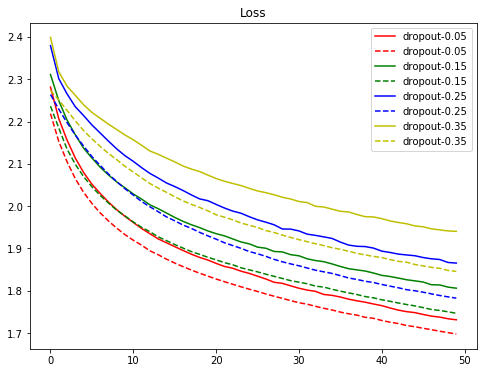

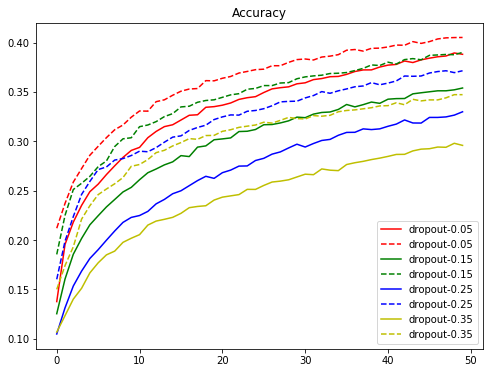

In [3]:
#比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.layers import Dropout
import itertools
%matplotlib inline
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)   
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
results = {}
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
# BATCH_SIZE = [32,128, 256, 1024]
BATCH_SIZE = 256
Dropout_EXP = [0.05,0.15,0.25,0.35]
results = {}
for dropout in iter(Dropout_EXP):   
    model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=dropout)
    model.summary()
    optimizer = optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag ="dropout-%s" % (str(dropout))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 12s 237us/step - loss: 0.8271 - acc: 0.7144 - val_loss: 1.5319 - val_acc: 0.4965
Epoch 50/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8140 - acc: 0.7198 - val_loss: 1.5729 - val_acc: 0.4906
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
______

50000/50000 [==============================] - 6s 114us/step - loss: 1.0346 - acc: 0.6470 - val_loss: 1.4565 - val_acc: 0.4997
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0270 - acc: 0.6513 - val_loss: 1.4581 - val_acc: 0.4943
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.0181 - acc: 0.6532 - val_loss: 1.4505 - val_acc: 0.5006
Epoch 50/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.0067 - acc: 0.6568 - val_loss: 1.4583 - val_acc: 0.4913
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048 

Epoch 46/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.2325 - acc: 0.5746 - val_loss: 1.5163 - val_acc: 0.4695
Epoch 47/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2259 - acc: 0.5769 - val_loss: 1.5195 - val_acc: 0.4699
Epoch 48/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.2185 - acc: 0.5797 - val_loss: 1.5215 - val_acc: 0.4672
Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.2113 - acc: 0.5835 - val_loss: 1.5149 - val_acc: 0.4706
Epoch 50/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.2057 - acc: 0.5833 - val_loss: 1.5173 - val_acc: 0.4703
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)      

Epoch 45/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5489 - acc: 0.4602 - val_loss: 1.6678 - val_acc: 0.4206
Epoch 46/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5452 - acc: 0.4613 - val_loss: 1.6660 - val_acc: 0.4201
Epoch 47/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5402 - acc: 0.4633 - val_loss: 1.6613 - val_acc: 0.4231
Epoch 48/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5351 - acc: 0.4662 - val_loss: 1.6586 - val_acc: 0.4245
Epoch 49/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5307 - acc: 0.4675 - val_loss: 1.6560 - val_acc: 0.4238
Epoch 50/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5268 - acc: 0.4681 - val_loss: 1.6522 - val_acc: 0.4258


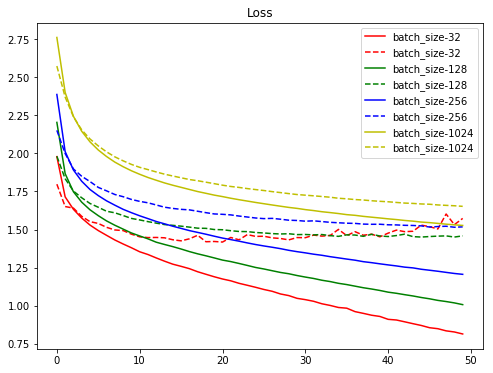

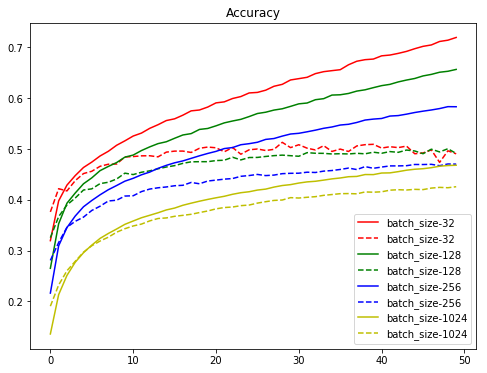

In [4]:
#比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.layers import Dropout
import itertools
%matplotlib inline
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
results = {}
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32,128, 256, 1024]
results = {}
for batch in iter(BATCH_SIZE):   
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag ="batch_size-%s" % (str(batch))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()